In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA

In [2]:
faces_all = fetch_olivetti_faces()
print(faces_all.DESCR)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/j-hyungjun/scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for

In [3]:
K = 20
faces = faces_all.images[faces_all.target == K]
faces

array([[[0.5165289 , 0.5123967 , 0.5082645 , ..., 0.42975205,
         0.42561984, 0.41735536],
        [0.5082645 , 0.5123967 , 0.5206612 , ..., 0.42975205,
         0.42975205, 0.4214876 ],
        [0.4876033 , 0.5123967 , 0.5289256 , ..., 0.4338843 ,
         0.42975205, 0.42975205],
        ...,
        [0.3305785 , 0.44214877, 0.45041323, ..., 0.55785125,
         0.5495868 , 0.5413223 ],
        [0.35123968, 0.4338843 , 0.446281  , ..., 0.54545456,
         0.55785125, 0.55785125],
        [0.33471075, 0.4338843 , 0.44214877, ..., 0.56198347,
         0.55785125, 0.5661157 ]],

       [[0.23553719, 0.35123968, 0.4338843 , ..., 0.45867768,
         0.446281  , 0.47107437],
        [0.21900827, 0.36363637, 0.4338843 , ..., 0.46694216,
         0.44214877, 0.46694216],
        [0.2520661 , 0.35123968, 0.4338843 , ..., 0.47933885,
         0.45041323, 0.46280992],
        ...,
        [0.3966942 , 0.5041322 , 0.62396693, ..., 0.21900827,
         0.07024793, 0.07024793],
        [0.5

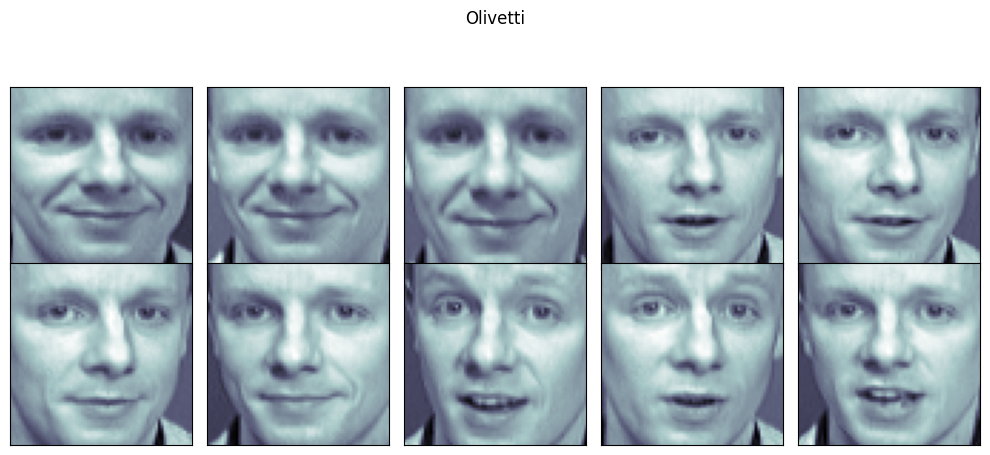

In [5]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(faces[n], cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

plt.suptitle("Olivetti")
plt.tight_layout()
plt.show()

In [7]:
pca = PCA(n_components=2)

X = faces_all.data[faces_all.target == K]
W = pca.fit_transform(X)

X_inv = pca.inverse_transform(W)

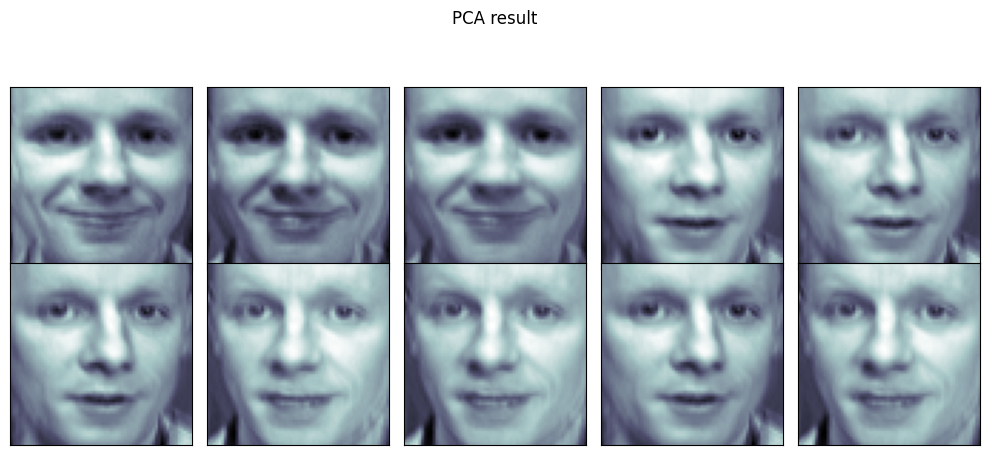

In [8]:
N = 2
M = 5
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(X_inv[n].reshape(64,64), cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

plt.suptitle("PCA result")
plt.tight_layout()
plt.show()

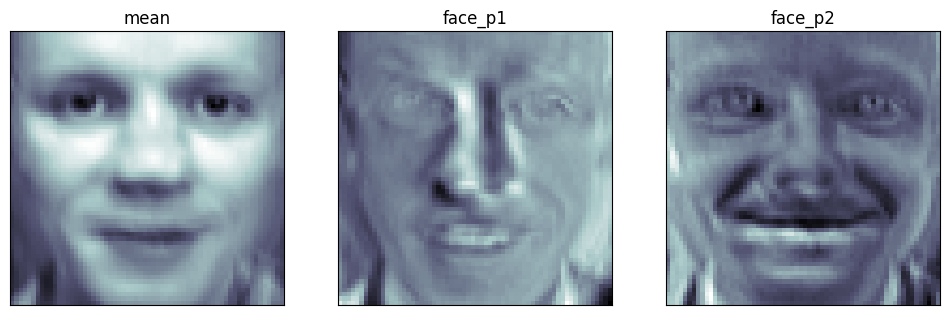

In [9]:
face_mean = pca.mean_.reshape(64,64)
face_p1 = pca.components_[0].reshape(64,64)
face_p2 = pca.components_[1].reshape(64,64)

plt.figure(figsize=(12,7))
plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False);plt.xticks([]);plt.yticks([]);plt.title("mean")
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False);plt.xticks([]);plt.yticks([]);plt.title("face_p1")
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False);plt.xticks([]);plt.yticks([]);plt.title("face_p2")
plt.show()

In [11]:
N = 2
M = 5
w = np.linspace(-5, 10, N*M)
w

array([-5.        , -3.33333333, -1.66666667,  0.        ,  1.66666667,
        3.33333333,  5.        ,  6.66666667,  8.33333333, 10.        ])

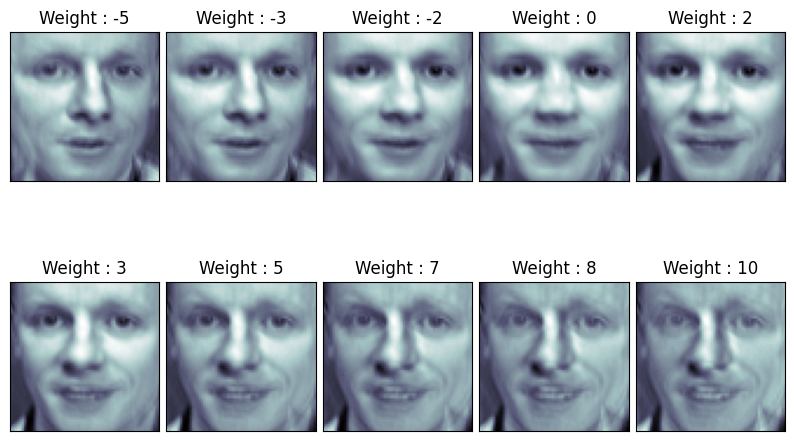

In [19]:
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + w[n] * face_p1, cmap=plt.cm.bone)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title('Weight : ' + str(round(w[n])))

plt.show()

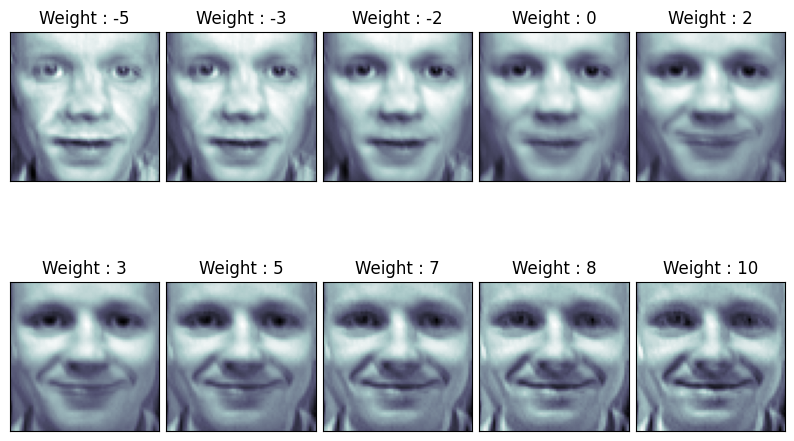

In [18]:
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + w[n] * face_p2, cmap=plt.cm.bone)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title('Weight : ' + str(round(w[n])))

plt.show()

In [15]:
nx, ny = (5,5)
x = np.linspace(-5, 8, nx)
y = np.linspace(-5, 8, ny)
w1, w2 = np.meshgrid(x, y)
w1, w2

(array([[-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ]]),
 array([[-5.  , -5.  , -5.  , -5.  , -5.  ],
        [-1.75, -1.75, -1.75, -1.75, -1.75],
        [ 1.5 ,  1.5 ,  1.5 ,  1.5 ,  1.5 ],
        [ 4.75,  4.75,  4.75,  4.75,  4.75],
        [ 8.  ,  8.  ,  8.  ,  8.  ,  8.  ]]))

In [16]:
w1.shape

(5, 5)

In [17]:
w1 = w1.reshape(-1,)
w2 = w2.reshape(-1,)
w1.shape

(25,)

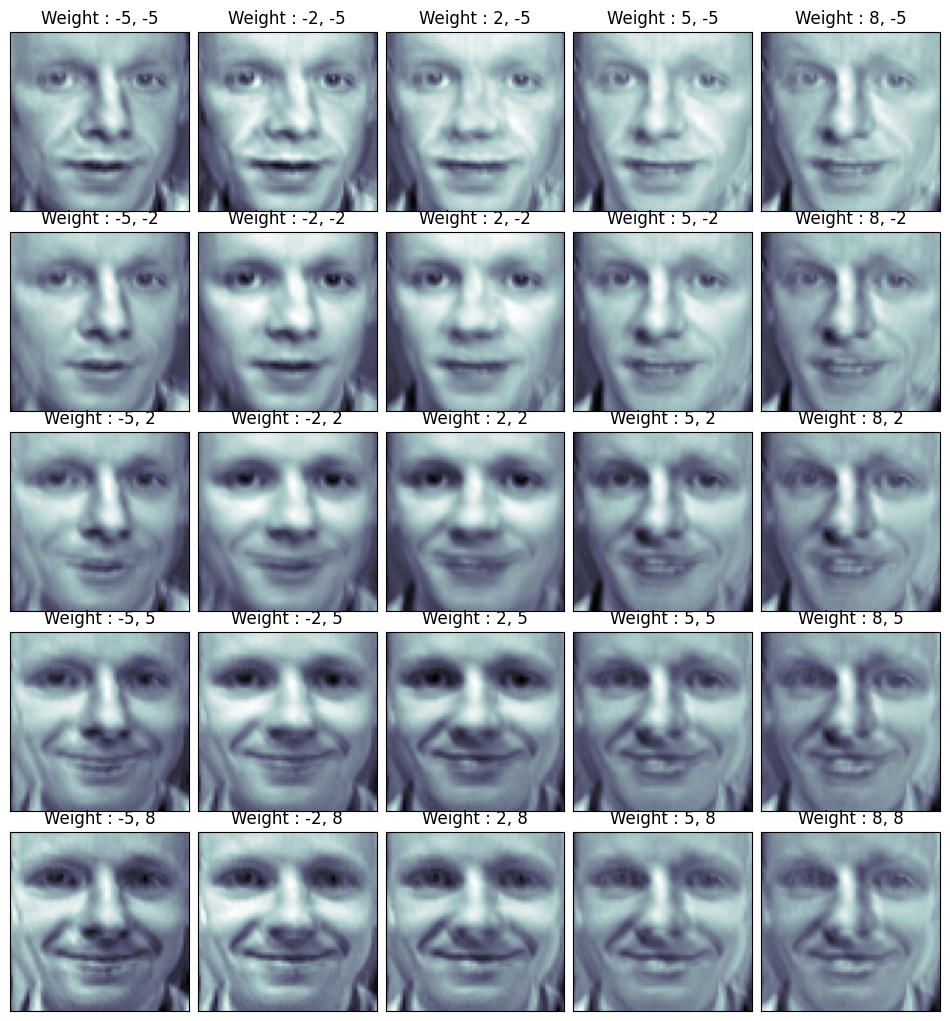

In [23]:
fig = plt.figure(figsize=(12,10))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

N = 5
M = 5

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + w1[n] * face_p1 + w2[n] * face_p2, cmap=plt.cm.bone)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title('Weight : ' + str(round(w1[n])) + ', ' + str(round(w2[n])))

plt.show()